* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

* Destination - The planet the passenger will be debarking to.

* Age - The age of the passenger.

* VIP - Whether the passenger has paid for special VIP service during the voyage.

* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

* Name - The first and last names of the passenger.

* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [44]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data\sample_submission.csv
./data\test.csv
./data\titanic_names.csv
./data\train.csv


In [45]:
train_data = pd.read_csv(".\\data\\train.csv")
test_data = pd.read_csv(".\\data\\test.csv")

In [46]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [47]:
def split_index(df):
    subset = df['PassengerId'].str.split('_', expand=True)
    subset.rename(columns={0: "Group", 1: "Prog"},inplace=True)
    return pd.concat([df, subset], axis = 1)

train_data = split_index(train_data)
test_data = split_index(test_data)

#train_data.columns

In [48]:
features = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age','VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Name']

def print_null_values(dataset,features):
    row, column = dataset.shape 
    for feature in features:
        values = dataset[feature].count()
        missing_values = dataset[feature].isnull().sum()
        nan_values = dataset[feature].isna().sum()
        perc = (values / row) * 100
        print("{0} {1} {2} {3:.2f}%".format(feature,values,missing_values,perc))
    
print_null_values(train_data,features)

HomePlanet 8492 201 97.69%
CryoSleep 8476 217 97.50%
Cabin 8494 199 97.71%
Destination 8511 182 97.91%
Age 8514 179 97.94%
VIP 8490 203 97.66%
RoomService 8512 181 97.92%
FoodCourt 8510 183 97.89%
ShoppingMall 8485 208 97.61%
Spa 8510 183 97.89%
VRDeck 8505 188 97.84%
Name 8493 200 97.70%


In [49]:
print_null_values(test_data,features)

HomePlanet 4190 87 97.97%
CryoSleep 4184 93 97.83%
Cabin 4177 100 97.66%
Destination 4185 92 97.85%
Age 4186 91 97.87%
VIP 4184 93 97.83%
RoomService 4195 82 98.08%
FoodCourt 4171 106 97.52%
ShoppingMall 4179 98 97.71%
Spa 4176 101 97.64%
VRDeck 4197 80 98.13%
Name 4183 94 97.80%


In [50]:
def split_deck(df):
    subset = df['Cabin'].str.split('/', expand=True)
    subset.rename(columns={0: "Deck", 1: "Num",2:"Side"},inplace=True)
    return pd.concat([df, subset], axis = 1)

train_data = split_deck(train_data)
test_data = split_deck(test_data)

In [51]:
test_data_index = test_data['PassengerId']

In [52]:
def split_name(df):
    subset = df['Name'].str.split(' ', expand=True)
    subset.rename(columns={0: "First name", 1: "Last name"},inplace=True)
    return pd.concat([df, subset], axis = 1)


train_data = split_name(train_data)
test_data = split_name(test_data)

In [53]:
import math
train_names = set(train_data["First name"].values)
test_names = set(test_data["First name"].values)

all_names = train_names.union(test_names)
len(all_names)


with open('allnames.txt', 'w') as f:
    for name in all_names:
        if not pd.isna(name):
            f.write(name)
            f.write("\n")

In [54]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,Group,Prog,Deck,Num,Side,First name,Last name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,Maham Ofracculy,False,0001,01,B,0,P,Maham,Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,44.0,Juanna Vines,True,0002,01,F,0,S,Juanna,Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,49.0,Altark Susent,False,0003,01,A,0,S,Altark,Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,193.0,Solam Susent,False,0003,02,A,0,S,Solam,Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,2.0,Willy Santantines,True,0004,01,F,1,S,Willy,Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,...,74.0,Gravior Noxnuther,False,9276,01,A,98,P,Gravior,Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,...,0.0,Kurta Mondalley,False,9278,01,G,1499,S,Kurta,Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,...,0.0,Fayey Connon,True,9279,01,G,1500,S,Fayey,Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,...,3235.0,Celeon Hontichre,False,9280,01,E,608,S,Celeon,Hontichre


In [55]:
train_data = train_data.drop(['Cabin','Name'], axis=1)
test_data = test_data.drop(['Cabin', 'Name'], axis=1)
y_train = train_data.pop('Transported')

In [56]:
all_data = pd.concat([train_data, test_data], axis = 0)

In [57]:
import unicodedata

def normalize(name):
    name = name.lower()
    name = name.strip()
    
    nfkd_form = unicodedata.normalize('NFKD', name)
    only_ascii = nfkd_form.encode('ASCII', 'ignore')
    only_ascii = only_ascii.decode('UTF-8')
    return only_ascii.strip()

all_data['First name'].fillna('',inplace=True)
all_data['First name'] = all_data['First name'].apply(normalize)

#all_data.head()

In [58]:
names = pd.read_csv(".\\data\\titanic_names.csv",index_col='Name')
names = names.squeeze()
dictnames = names.to_dict()
all_data["Gender"] = all_data['First name'].map(dictnames)

In [59]:
all_data

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Prog,Deck,Num,Side,First name,Last name,Gender
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0001,01,B,0,P,maham,Ofracculy,1.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,0002,01,F,0,S,juanna,Vines,1.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0003,01,A,0,S,altark,Susent,0.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0003,02,A,0,S,solam,Susent,0.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,0004,01,F,1,S,willy,Santantines,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,9266,02,G,1496,S,jeron,Peter,0.0
4273,9269_01,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,9269,01,NaN,NaN,NaN,matty,Scheron,1.0
4274,9271_01,Mars,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,9271,01,D,296,P,jayrin,Pore,0.0
4275,9273_01,Europa,False,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,9273,01,D,297,P,kitakan,Conale,1.0


In [60]:
all_data_cryo = all_data.dropna(subset=['CryoSleep']).copy()
all_data_cryo["VIP"].fillna(False,inplace=True)
all_data_cryo["VIP"] = all_data_cryo["VIP"].astype(int)
all_data_cryo["CryoSleep"] = all_data_cryo["CryoSleep"].astype(int)
all_data_cryo["Total Expenses"] = all_data_cryo["RoomService"].fillna(0) + all_data_cryo["FoodCourt"].fillna(0) + all_data_cryo["ShoppingMall"].fillna(0) + all_data_cryo["Spa"].fillna(0) + all_data_cryo["VRDeck"].fillna(0)
cols = ["CryoSleep","VIP","HomePlanet","Destination","Age","Total Expenses","Deck","Side","Gender"]
test_corr = all_data_cryo[cols]
test_corr =  pd.get_dummies(test_corr)


<AxesSubplot:>

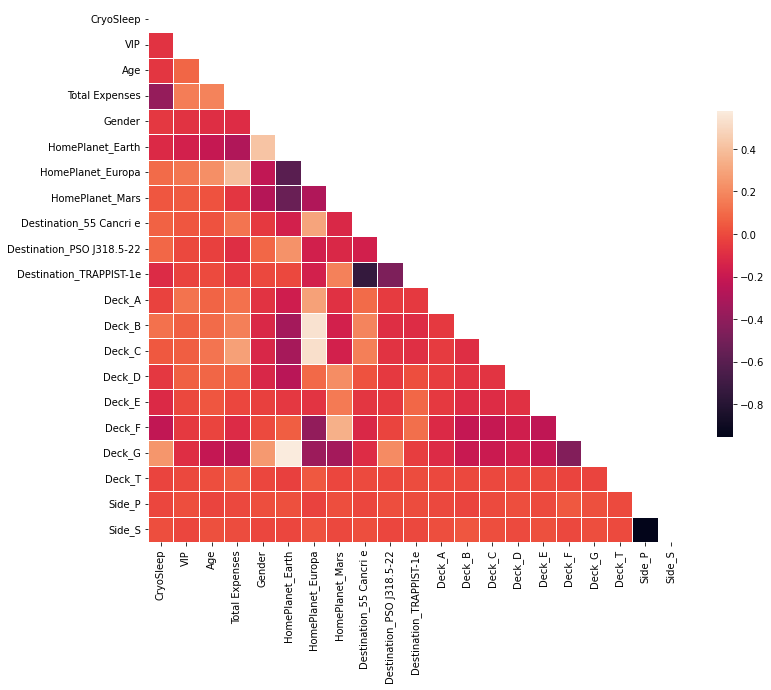

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

corr = test_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, mask=mask,square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:xlabel='Log Total Expenses', ylabel='Count'>

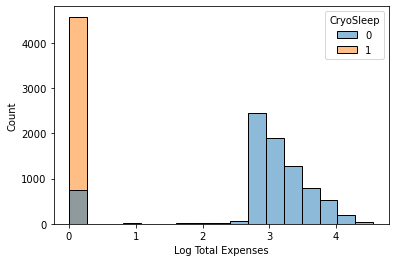

In [62]:
all_data_cryo["Log Total Expenses"] = np.log10(all_data_cryo["Total Expenses"] + 1.0)
all_data_cryo.reset_index(inplace=True)

sns.histplot(data=all_data_cryo,hue='CryoSleep',x='Log Total Expenses')

In [63]:
test_cryo = all_data_cryo["Log Total Expenses"] < 1
test_cryo = test_cryo.astype(int)

print("CryoSleep accuracy {0:.2f}".format((all_data_cryo["CryoSleep"] == test_cryo).mean()))

CryoSleep accuracy 0.94


In [64]:
all_data_cryo["VIP"].fillna(False,inplace=True)
def calclog_total_expenses(df):
    df["Total Expenses"] = df["RoomService"].fillna(0) + df["FoodCourt"].fillna(0) + df["ShoppingMall"].fillna(0) + df["Spa"].fillna(0) + df["VRDeck"].fillna(0)
    df["Log Total Expenses"] = np.log10(df["Total Expenses"] + 1.0)
    return df

train_data = calclog_total_expenses(train_data)
test_data = calclog_total_expenses(test_data)

In [65]:
train_data["CryoSleepCalc"] = train_data["Log Total Expenses"] < 1
train_data["CryoSleep"].fillna(train_data["CryoSleepCalc"], inplace=True)

test_data["CryoSleepCalc"] = test_data["Log Total Expenses"] < 1
test_data["CryoSleep"].fillna(test_data["CryoSleepCalc"], inplace=True)

train_data.drop('CryoSleepCalc', inplace=True, axis=1)
test_data.drop('CryoSleepCalc', inplace=True, axis=1)

In [66]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Prog,Deck,Num,Side,First name,Last name,Total Expenses,Log Total Expenses
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,0013,01,G,3,S,Nelly,Carsoning,0.0,0.000000
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,0018,01,F,4,S,Lerome,Peckers,2832.0,3.452247
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,0019,01,C,0,S,Sabih,Unhearfus,0.0,0.000000
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,0021,01,C,1,S,Meratz,Caltilter,7418.0,3.870345
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,0023,01,F,5,S,Brence,Harperez,645.0,2.810233


In [67]:
train_data["HomePlanet"].fillna("Earth", inplace=True)
test_data["HomePlanet"].fillna("Earth", inplace=True)

In [68]:
train_data["Destination"].fillna("TRAPPIST-1e", inplace=True)
test_data["Destination"].fillna("TRAPPIST-1e", inplace=True)

In [69]:
train_data["VIP"].fillna(False, inplace=True)
test_data["VIP"].fillna(False, inplace=True)

In [70]:
all_data_age = all_data.dropna(subset=['Age']).copy()

<AxesSubplot:xlabel='Age', ylabel='Count'>

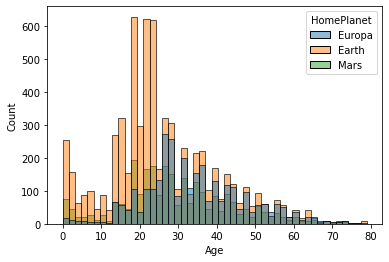

In [71]:
all_data_age.reset_index(inplace=True)
sns.histplot(data=all_data_age,hue='HomePlanet',x='Age')

In [72]:
grouped_ages = all_data_age[['HomePlanet', 'Age']].groupby(['HomePlanet']).agg(pd.Series.mode)
grouped_ages

,Age
HomePlanet,
Earth,24.0
Europa,26.0
Mars,18.0


In [73]:
median_ages = all_data_age['Age'].mode()
median_ages

0    18.0
dtype: float64

In [74]:
def impute_age(dataset):
    for index, row in dataset.iterrows():
        home = row['HomePlanet']
        age = row['Age']
        if pd.isna(age):
            try:
                age = grouped_ages[home]
            except:
                age = median_ages
                
            dataset.at[index,'Age'] = age
            
impute_age(train_data)
impute_age(test_data)

In [75]:
def impute_gender(dataset):
    names = dataset['First name'].fillna('')
    names = names.apply(normalize)
    return names.map(dictnames)

train_data["Gender"] = impute_gender(train_data)
test_data["Gender"] = impute_gender(train_data)

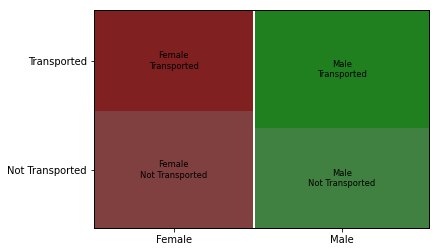

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic


survived_mapping = {False:'Not Transported',True:'Transported'}
gender_mapping = {0:'Male',1:'Female'}
train_data['TransportedText'] = y_train.map(survived_mapping)
train_data['GenderText'] = train_data['Gender'].map(gender_mapping)
mosaic(train_data, ['GenderText', 'TransportedText'])
plt.show()

train_data = train_data.drop(columns=['TransportedText','GenderText'])

In [77]:
train_data["Deck"].fillna("F", inplace=True)
test_data["Deck"].fillna("F", inplace=True)

In [78]:
train_data["Side"].fillna("S", inplace=True)
test_data["Side"].fillna("S", inplace=True)

In [79]:
def age_band(dataset,bins = 5):
    labels = range(bins)
    return pd.cut(dataset['Age'], bins=bins,labels=labels)

train_data['AgeBand'] = age_band(train_data,6).astype('int')
test_data['AgeBand'] = age_band(test_data,6).astype('int')

In [80]:
train_data_surname = pd.concat([train_data,y_train], axis = 1)
surname_map = train_data_surname.groupby(['Last name','Group'])['Transported'].agg(['count', 'mean'])

In [81]:
m=3

mean_survived = y_train.mean()
counts = surname_map['count']
means = surname_map['mean']

smooth = (counts * means + m * mean_survived) / (counts + m)

def family_info(dataset):
    for index, row in dataset.iterrows():
        surname = row['Last name']
        ticket = row['Group']
        
        try:
            survived = smooth[surname,ticket]
        except:
            survived = mean_survived
        
        dataset.at[index,'FamilySurvived'] = survived
        
family_info(train_data) 
family_info(test_data) 

In [82]:
interesting_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Deck', 'Side', 'Total Expenses', 'Log Total Expenses', 'AgeBand', 'FamilySurvived']

In [83]:
train_data = train_data[interesting_cols]
test_data = test_data[interesting_cols]

train_data["RoomService"].fillna(0, inplace=True)
train_data["FoodCourt"].fillna(0, inplace=True)
train_data["ShoppingMall"].fillna(0, inplace=True)
train_data["Spa"].fillna(0, inplace=True)
train_data["VRDeck"].fillna(0, inplace=True)

test_data["RoomService"].fillna(0, inplace=True)
test_data["FoodCourt"].fillna(0, inplace=True)
test_data["ShoppingMall"].fillna(0, inplace=True)
test_data["Spa"].fillna(0, inplace=True)
test_data["VRDeck"].fillna(0, inplace=True)

print_null_values(test_data,interesting_cols)


HomePlanet 4277 0 100.00%
CryoSleep 4277 0 100.00%
Destination 4277 0 100.00%
Age 4277 0 100.00%
VIP 4277 0 100.00%
RoomService 4277 0 100.00%
FoodCourt 4277 0 100.00%
ShoppingMall 4277 0 100.00%
Spa 4277 0 100.00%
VRDeck 4277 0 100.00%
Deck 4277 0 100.00%
Side 4277 0 100.00%
Total Expenses 4277 0 100.00%
Log Total Expenses 4277 0 100.00%
AgeBand 4277 0 100.00%
FamilySurvived 4277 0 100.00%


In [84]:
train_data = pd.get_dummies(train_data)
test_data =  pd.get_dummies(test_data)

In [91]:
train_data = train_data.drop(['Total Expenses'], axis=1)
test_data = test_data.drop(['Total Expenses'], axis=1)

In [92]:
train_data["VIP"] = train_data["VIP"].astype(int)
test_data["VIP"] = test_data["VIP"].astype(int)

train_data["CryoSleep"] = train_data["CryoSleep"].astype(int)
test_data["CryoSleep"] = test_data["CryoSleep"].astype(int)

In [94]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

train_data['RoomService'] = mms.fit_transform(train_data["RoomService"].values.reshape(-1, 1))
test_data['RoomService'] = mms.transform(test_data["RoomService"].values.reshape(-1, 1))

train_data['FoodCourt'] = mms.fit_transform(train_data["FoodCourt"].values.reshape(-1, 1))
test_data['FoodCourt'] = mms.transform(test_data["FoodCourt"].values.reshape(-1, 1))

train_data['ShoppingMall'] = mms.fit_transform(train_data["ShoppingMall"].values.reshape(-1, 1))
test_data['ShoppingMall'] = mms.transform(test_data["ShoppingMall"].values.reshape(-1, 1))

train_data['Spa'] = mms.fit_transform(train_data["Spa"].values.reshape(-1, 1))
test_data['Spa'] = mms.transform(test_data["Spa"].values.reshape(-1, 1))

train_data['VRDeck'] = mms.fit_transform(train_data["VRDeck"].values.reshape(-1, 1))
test_data['VRDeck'] = mms.transform(test_data["VRDeck"].values.reshape(-1, 1))

train_data

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Log Total Expenses,AgeBand,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0,39.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,...,0,1,0,0,0,0,0,0,1,0
1,0,24.0,0,0.007608,0.000302,0.001064,0.024500,0.001823,2.867467,1,...,0,0,0,0,0,1,0,0,0,1
2,0,58.0,1,0.003001,0.119948,0.000000,0.299670,0.002030,4.016365,4,...,1,0,0,0,0,0,0,0,0,1
3,0,33.0,0,0.000000,0.043035,0.015793,0.148563,0.007997,3.714078,2,...,1,0,0,0,0,0,0,0,0,1
4,0,16.0,0,0.021149,0.002348,0.006428,0.025214,0.000083,3.038223,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.000000,0.228726,0.000000,0.073322,0.003066,3.931305,3,...,1,0,0,0,0,0,0,0,1,0
8689,1,18.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,...,0,0,0,0,0,0,1,0,0,1
8690,0,26.0,0,0.000000,0.000000,0.079687,0.000045,0.000000,3.272770,1,...,0,0,0,0,0,0,1,0,0,1
8691,0,32.0,0,0.000000,0.035186,0.000000,0.015753,0.134049,3.666331,2,...,0,0,0,0,1,0,0,0,0,1


In [95]:
X_train = train_data.copy()
X_test = test_data.copy()

In [101]:
from sklearn.ensemble import RandomForestClassifier

treshold = 0.01


forest = RandomForestClassifier(n_estimators=250,criterion='gini',max_depth=90,max_leaf_nodes=120
                              ,verbose=1)
forest.fit(X_train,y_train)

importances = forest.feature_importances_
indexes = np.argsort(importances)[::-1]

columns = []


for i,f in enumerate(indexes):
    importance = importances[f]
    if importance >= treshold:
        column = X_train.columns[f]
        columns.append(column)
        print("{0:2} {1:30} {2:.2f}".format(i+1,column,importances[f]))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


 1 FamilySurvived                 0.66
 2 Log Total Expenses             0.08
 3 CryoSleep                      0.05
 4 Spa                            0.04
 5 RoomService                    0.04
 6 VRDeck                         0.04
 7 FoodCourt                      0.03
 8 Age                            0.02
 9 ShoppingMall                   0.02
10 HomePlanet_Earth               0.01


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    1.0s finished


In [102]:
X_train = X_train[columns]
X_test = X_test[columns]

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]

param_grid = [{'C': param_range, 
               'kernel': ['linear']},
              {'C': param_range, 
               'gamma': param_range, 
               'kernel': ['rbf']}]

model = SVC()

gs = GridSearchCV(estimator=model, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=10,
                  n_jobs=-1)



start = time.time()
gs = gs.fit(X_train, y_train)
print(f'Time: {time.time() - start}')

print("Model accuracy {0:.2f}%".format(gs.best_score_ * 100))
print(gs.best_params_)

In [107]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

y_probs = []

folds = StratifiedKFold(n_splits = 5, shuffle=True)
for fold, (train_id, test_id) in enumerate(folds.split(X_train,y_train)):
    print("fold : ", fold + 1, end = ' ')
    # Split data
    Xtrain = X_train.iloc[train_id]
    ytrain = y_train.iloc[train_id]
    Xvalid = X_train.iloc[test_id]
    yvalid = y_train.iloc[test_id]
    
    model =  RandomForestClassifier()
    model.fit(Xtrain, ytrain)
    
    # Print validation score to see how it works
    valid_pred = model.predict(Xvalid)
    valid_score = accuracy_score(yvalid, valid_pred)
    print( "Validation score: ", valid_score, end = ' ')

    # test
    y_probs.append(model.predict_proba(X_test))
    print(" ")
    
    
y_prob = sum(y_probs) / len(y_probs)  
   

fold :  1 Validation score:  0.9505462909718229  
fold :  2 Validation score:  0.9447958596894767  
fold :  3 Validation score:  0.9482461184588844  
fold :  4 Validation score:  0.952819332566168  
fold :  5 Validation score:  0.9470655926352128  


array([[0.0884    , 0.9116    ],
       [0.95      , 0.05      ],
       [0.67646111, 0.32353889],
       ...,
       [0.112     , 0.888     ],
       [0.28      , 0.72      ],
       [0.17266667, 0.82733333]])

In [113]:
output = pd.DataFrame({'PassengerId': test_data_index, 'Transported': np.squeeze(y_prob)[:,1] > 0.5})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
